In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree 
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Predict which ballon is inflated 

### Source: "http://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult-stretch.data"

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult-stretch.data",
                header=None)

In [3]:
columns = ["color", "size", "act", "age", "inflated"]
df.columns = columns

In [4]:
df.head()

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F


In [5]:
new_df = pd.DataFrame()

In [6]:
le = LabelEncoder()

In [7]:
new_df["color"] = le.fit_transform(df["color"])
new_df["size"] = le.fit_transform(df["size"])
new_df["act"] = le.fit_transform(df["act"])
new_df["age"] = le.fit_transform(df["age"])
new_df["Class"] = df.iloc[:, -1].apply(lambda x: 1 if x == "T" else 0)

In [8]:
df["Class"] = df.iloc[:, -1].apply(lambda x: 1 if x == "T" else 0)

In [9]:
new_df.head()

,color,size,act,age,Class
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,1,0


In [10]:
x = new_df.iloc[:, :-1]

In [11]:
y = new_df.Class

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=0)

In [13]:
tr = tree.DecisionTreeClassifier(criterion='gini',
                              max_depth=3,
                              random_state=1)
tr.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

#### Expected overfitting because of small data set

In [14]:
tr.score(X_test, Y_test)

1.0

In [15]:
y_pred = tr.predict(X_test)
y_pred

array([0, 1, 0, 0, 1])

In [16]:
with open("baloon_tree1.dot", "w") as f:
    f = tree.export_graphviz(tr, feature_names=new_df.columns[:-1], out_file=f)

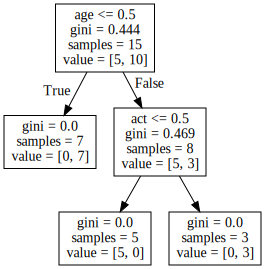

In [17]:
graphviz.Source(open("baloon_tree1.dot").read())

In [18]:
tr.feature_importances_

array([0.    , 0.    , 0.5625, 0.4375])

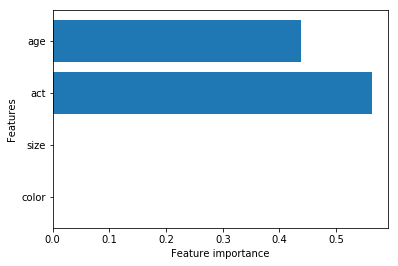

In [19]:
def important_features(model):
    "Bar graph of Gini importance"
    plt.barh(range(len(x.columns)), model.feature_importances_, align="center")
    plt.ylabel("Features")
    plt.xlabel("Feature importance")
    plt.yticks(np.arange(len(x.columns)), new_df.columns)
important_features(tr)

#### The plot above visually confirms that act and age are the importanct features.

In [20]:
pd.crosstab(Y_test, y_pred, rownames=["Observed"], colnames=["Predicted"])

Predicted,0,1
Observed,,
0,3,0
1,0,2


#### True Negatives = 3, True Positives = 2

### Visually confustion matrix

In [21]:
pred_tr = tr.fit(X_test, Y_test)
with open("baloon_tree2.dot", "w") as f2:
    f2 = tree.export_graphviz(pred_tr, feature_names=new_df.columns[:-1], out_file=f2)

### Legend
#### age: 0 = ADULT,  age: 1 = CHILD
#### act: 0 = DIP,  act: 1 = STRETCH
#### age 0 or act 1 = inflated balloon

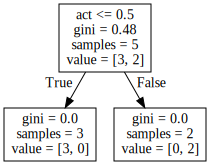

In [22]:
graphviz.Source(open("baloon_tree2.dot").read())

#### True Negatives = 3, True Positives = 2